In [3]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

In [4]:
ticker = "GOOGL"
data = yf.download(ticker, start="2000-01-01", end="2023-12-05")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


In [6]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
len(data[data["Open"] <= 0]), len(data[data["High"] <= 0]), len(data[data["Low"] <= 0]), len(data[data["Close"] <= 0]), len(data[data["Adj Close"] <= 0])

(0, 0, 0, 0, 0)

In [11]:
data["Date"] = pd.to_datetime(data.index)

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924,2004-08-19
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856,2004-08-20
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512,2004-08-23
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748,2004-08-24
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044,2004-08-25


In [13]:
(data["Date"][1] - data["Date"][0]).total_seconds()

86400.0

In [14]:
data["Date"][1] > data["Date"][0]

True

In [15]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Date
count,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4.857000e+03,4857
mean,41.558130,41.994235,41.122132,41.567687,41.567687,1.204938e+08,2014-04-11 09:05:31.315627008
min,2.482232,2.546046,2.401401,2.502753,2.502753,9.312000e+06,2004-08-19 00:00:00
25%,12.905906,13.013013,12.772022,12.894144,12.894144,3.181600e+07,2009-06-16 00:00:00
50%,27.022499,27.202499,26.760500,27.019501,27.019501,6.445548e+07,2014-04-11 00:00:00
75%,57.650002,58.344002,57.137501,57.792500,57.792500,1.460658e+08,2019-02-07 00:00:00
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.643023e+09,2023-12-04 00:00:00
std,38.283539,38.715618,37.869433,38.301139,38.301139,1.494352e+08,NaN


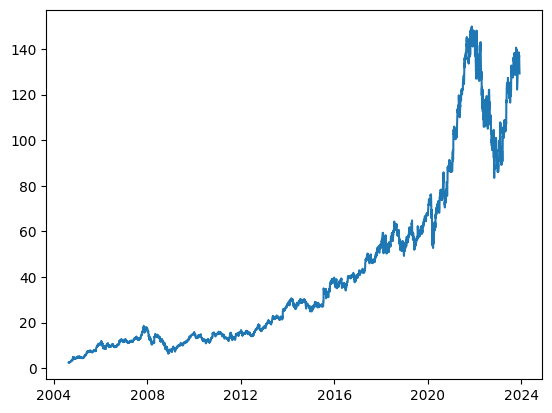

In [17]:
_ = plt.figure()
plt.plot(data["Date"], data["Adj Close"])
plt.show()

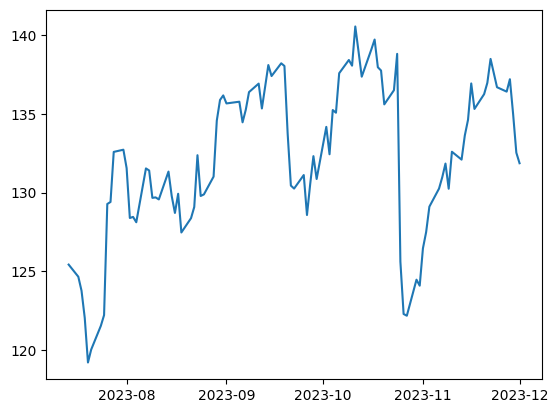

In [20]:
_ = plt.figure()
plt.plot(data["Date"][-100:-1], data["Adj Close"][-100:-1])
plt.show()

In [23]:
data["Rolling Mean"] = data["Adj Close"].rolling(window=60).mean()
data["Rolling Std"] = data["Adj Close"].rolling(window=60).std()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Rolling Mean,Rolling Std
Date,,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924,2004-08-19,NaN,NaN
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856,2004-08-20,NaN,NaN
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512,2004-08-23,NaN,NaN
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748,2004-08-24,NaN,NaN
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044,2004-08-25,NaN,NaN


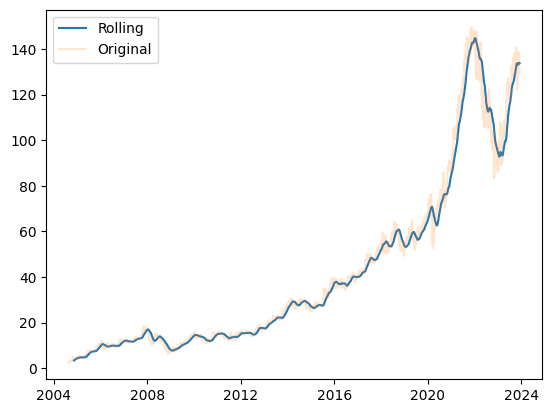

In [26]:
_ = plt.figure()
plt.plot(data["Date"], data["Rolling Mean"], label="Rolling")
plt.plot(data["Date"], data["Adj Close"], label="Original", alpha=0.2)
plt.legend()
plt.show()

In [27]:
import mplfinance as mpl

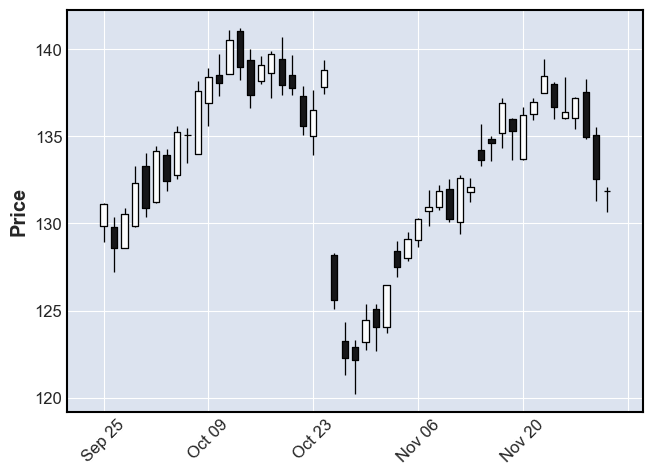

In [31]:
mpl.plot(data[-50:-1], type="candle")

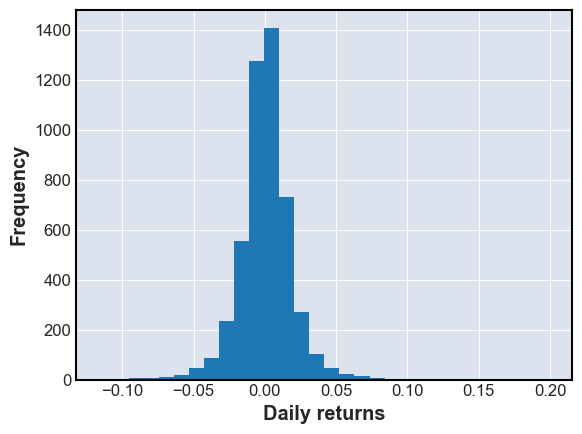

In [32]:
returns = data["Adj Close"].pct_change()

_ = plt.figure()
plt.hist(returns.dropna(), bins=30)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()

In [34]:
import numpy as np 
import scipy.stats as sp 

avg_return = np.mean(returns)
std_return = np.std(returns)
skew_return = sp.skew(returns.dropna())
kurtosis_return = sp.kurtosis(returns.dropna())

avg_return, std_return, skew_return, kurtosis_return

(0.0009980105833004359,
 0.019358873757310786,
 0.6307663379551789,
 9.264918689637412)

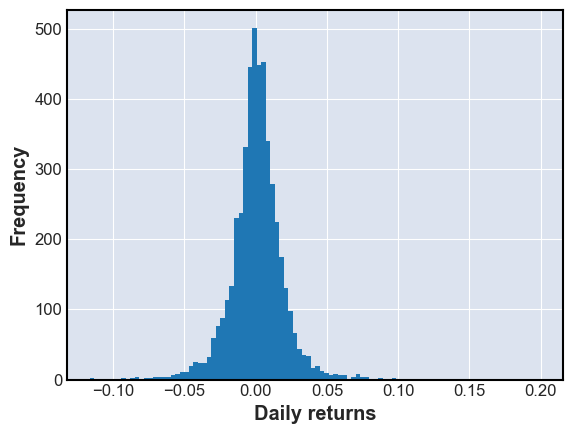

In [36]:
_ = plt.figure()
plt.hist(returns.dropna(), bins=100)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()

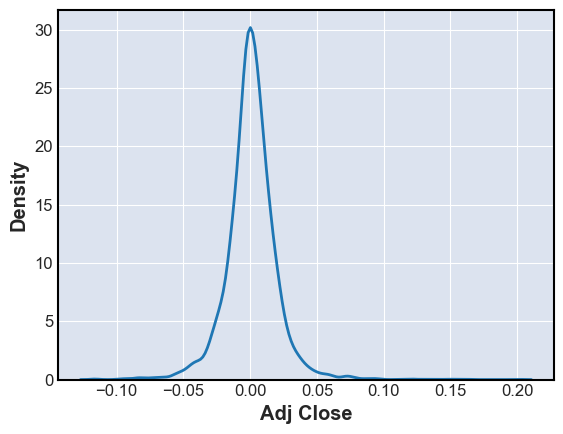

In [42]:
import seaborn as sns  

_ = plt.figure()
sns.kdeplot(returns)
plt.show()

In [45]:
returns[-50:-1].values

array([ 0.00660269, -0.01937299,  0.01532228,  0.0135591 , -0.01095909,
        0.02529419, -0.01296866,  0.02121886, -0.00125701,  0.01858292,
        0.00610551, -0.00260078,  0.01803568, -0.01124156, -0.01158524,
        0.01266748,  0.00445719, -0.01259658, -0.00152223, -0.01560794,
        0.00663712,  0.01692306, -0.09509399, -0.02651064, -0.00089958,
        0.01874438, -0.00305317,  0.01910054,  0.0082246 ,  0.01262851,
        0.00890778,  0.00552784,  0.00664271, -0.01213585,  0.01804354,
       -0.00377102,  0.011583  ,  0.00748391,  0.01715939, -0.01183083,
        0.00694703,  0.00528441,  0.01109735, -0.01299735, -0.00204842,
        0.00579131, -0.01610781, -0.01822362, -0.00505545])

In [47]:
returns[-100:-50].values

array([ 0.00706598, -0.00613935, -0.00713999, -0.0139787 , -0.02319103,
        0.00687919,  0.01258125,  0.00559533,  0.05776946,  0.00100557,
        0.02457502,  0.00105596, -0.00881554, -0.02409729,  0.00054519,
       -0.00264692,  0.02669579, -0.0009884 , -0.01324194,  0.00023136,
       -0.00100243,  0.01366166, -0.01180235, -0.00832179,  0.00947942,
       -0.01893472,  0.00713946,  0.00553094,  0.02548802, -0.01956634,
        0.00077058,  0.00870026,  0.0271736 ,  0.00973469,  0.00213419,
       -0.00374528,  0.00081086, -0.00964865,  0.00594963,  0.00828043,
        0.00395948, -0.0115396 ,  0.01012273,  0.0101675 , -0.00506888,
        0.00589529, -0.00123011, -0.0311503 , -0.02467476, -0.00145663])